# Functions

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def getValue(df):
    result = 0.5 * df['pass_car'] + 0.2 * df['average_speed'] - 0.2 *df['average_wait'] - 0.1*df['average_drive']
    return result

In [45]:
def getValue_single(df):
    result = 0.4 * df['average_speed'] - 0.4 *df['average_wait'] - 0.2*df['average_drive']
    return result

综合评价公式：$$E=0.5\ast N_{car}+\ 0.2\ast S_{avg}-0.2\ast T_{wait}+0.1\ast T_{drive}$$

In [79]:
def getMetrixPlot(df, name, legendlabel = 'Performance Index'):
    variables = ['Low', 'Medium', 'High']
    values = df

    # 创建热图
    fig, ax = plt.subplots()
    im = ax.imshow(values, cmap='viridis')

    # 添加标签
    for i in range(len(variables)):
        for j in range(len(variables)):
            text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

    # 设置坐标轴
    ax.set_xticks(np.arange(len(variables)))
    ax.set_yticks(np.arange(len(variables)))
    ax.set_xticklabels(variables)
    ax.set_yticklabels(['High', 'Medium', 'Low'])
    ax.set_title(name)
    ax.set_xlabel('north-south direction traffic flow')
    ax.set_ylabel('east-west direction traffic flow')
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel(legendlabel, rotation=270, labelpad=15)  # 在色带旁边添加文本说明


    # 显示热图
    plt.show()

In [47]:
def getData(df):
    ## get analysis of one states and get results
    df.columns = df.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
    df = df[['random_switch', 'pass_car', 'average_speed', 'average_wait', 'average_drive']]

    df_random = df[df.random_switch == True][1:]
    df_normal = df[df.random_switch == False][1:]
    df_random = df_random.drop(columns=['random_switch'])
    df_normal = df_normal.drop(columns=['random_switch'])
    return df_random, df_normal

In [48]:
def getRLData(df):
    df.columns = df.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
    df.sort_values(by='step').reset_index(drop=True)
    index = df[df['time'] == 0].index[-20000:]
    df_new = df.iloc[index-1]
    df_new = df_new[['avg_reward','pass_car','average_speed','average_wait','average_drive']].reset_index(drop=True)

    return df_new

In [49]:
def getBoxplots(df):
    columns_to_plot = df.columns.to_list()

    # Plot the box plots
    plt.figure(figsize=(12, 6))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(1, len(columns_to_plot), i)
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.title(f'Box Plot for {column}')
        plt.grid(True, axis='y', linestyle='--')

        # Calculate statistics for each column
        column_max = df[column].max()
        column_min = df[column].min()
        column_mean = df[column].mean()

        # Add text annotations for mean, max, and min values
        plt.text(1, column_mean, f"Mean: {column_mean:.2f}", ha='center', va='bottom', color='red')
        plt.text(1, column_max, f"Max: {column_max}", ha='center', va='bottom', color='blue')
        plt.text(1, column_min, f"Min: {column_min}", ha='center', va='top', color='green')
    plt.tight_layout()
    plt.show()


In [50]:
def getTrend(df_bd):
    # List of columns to plot
    columns_to_plot = ['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']

    # Plot each column separately
    plt.figure(figsize=(18, 10))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(5, 1, i)
        plt.scatter(df_bd.index, df_bd[column], marker='o',s=1)
        plt.xlabel('step')
        plt.ylabel(column)
        plt.title(f'{column} trend during training')
        plt.grid(True, linestyle='--')
        # Fit a linear regression line
        z = np.polyfit(df_bd.index, df_bd[column], 5)
        p = np.poly1d(z)
        plt.plot(df_bd.index, p(df_bd.index), color='red')


    plt.tight_layout()
    plt.show()

# Data analysis

This is a document for analysis the stupid model solution

## Pre-defined mode & Random mode

In [51]:
## Load data 
csv_HH = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_HH-table.csv')
csv_HM = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_HM-table.csv')
csv_HL = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_HL-table.csv')
csv_MM = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_MM-table.csv')
csv_ML = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_ML-table.csv')
csv_LL = pd.read_csv('./model/final/0_singel_junction_model_random pre_defined_LL-table.csv')

In [52]:
random_HH, normal_HH = getData(csv_HH)
random_HM, normal_HM = getData(csv_HM)
random_HL, normal_HL = getData(csv_HL)
random_MM, normal_MM = getData(csv_MM)
random_ML, normal_ML = getData(csv_ML)
random_LL, normal_LL = getData(csv_LL)


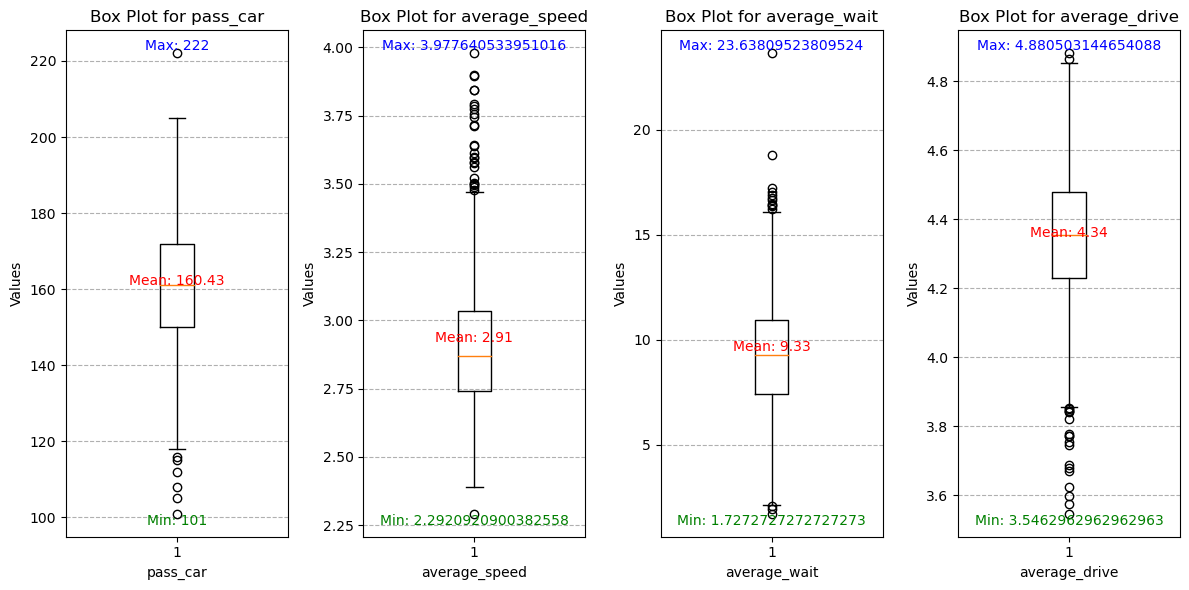

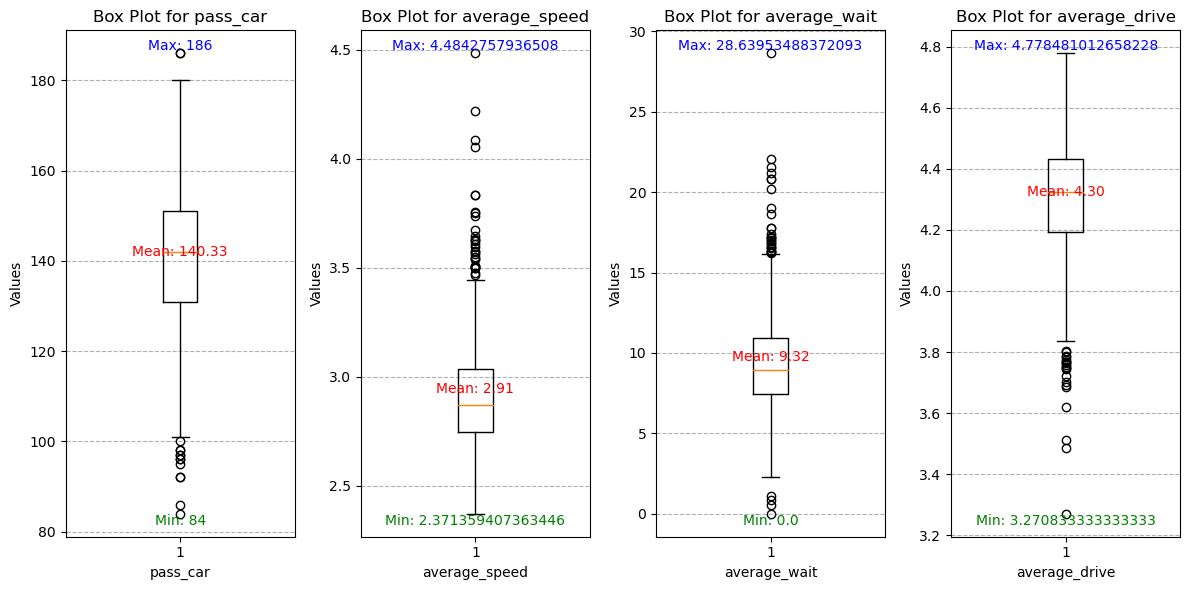

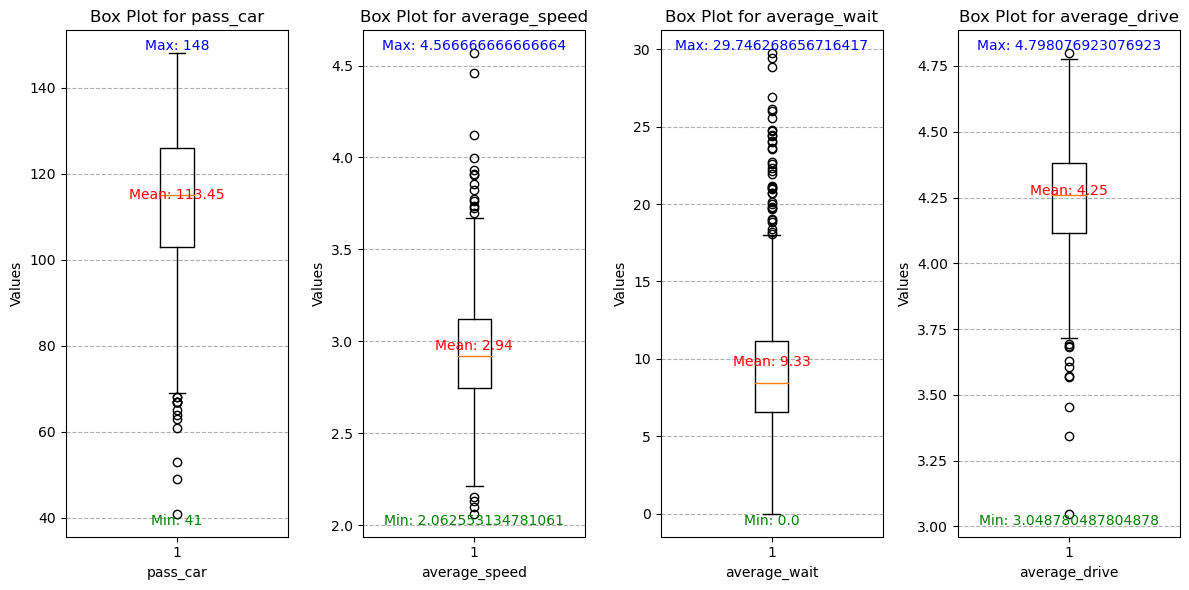

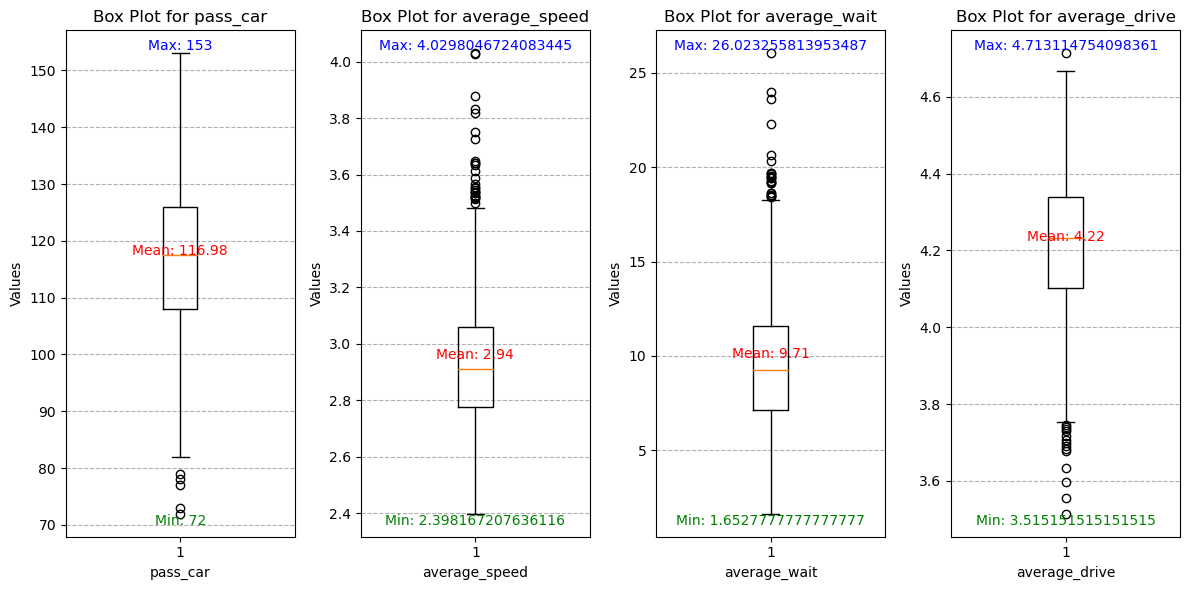

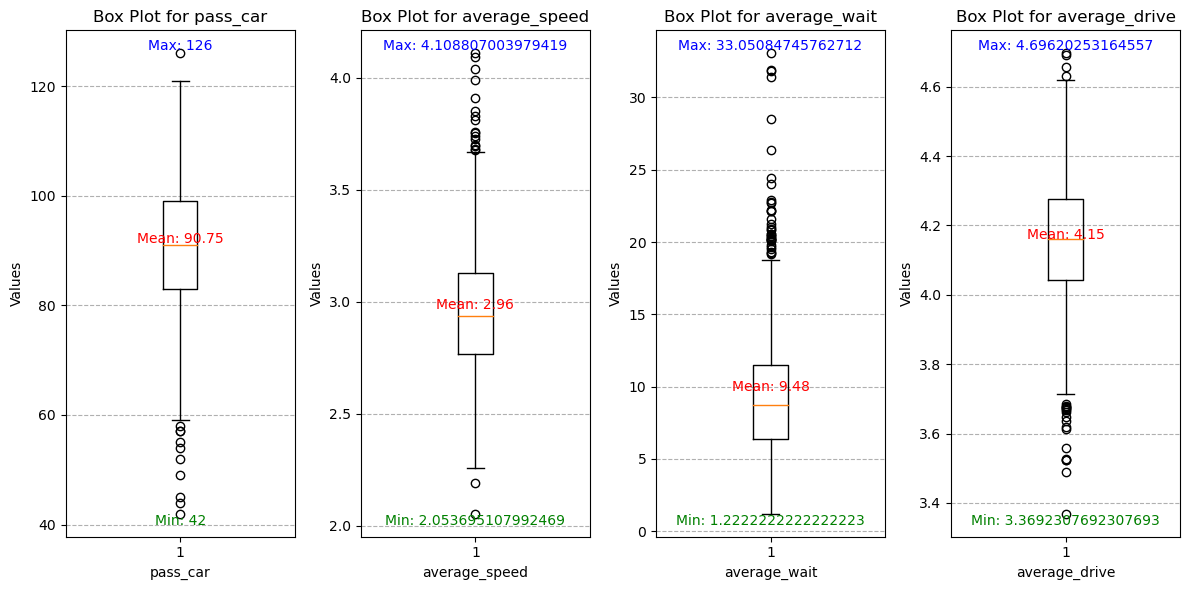

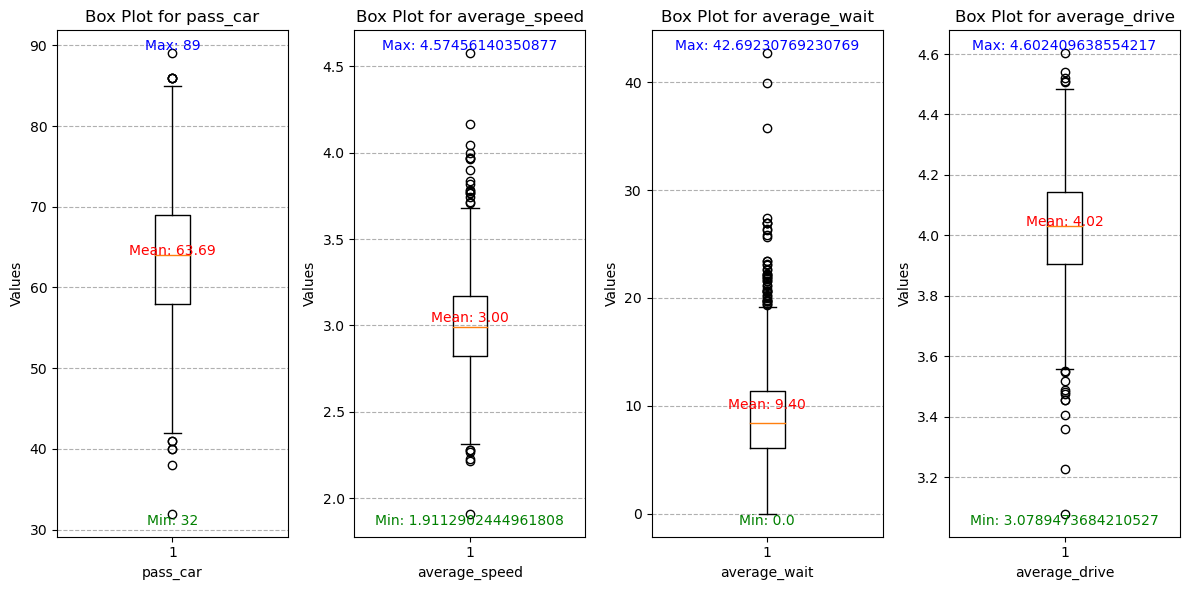

In [53]:
getBoxplots(random_HH)
getBoxplots(random_HM)
getBoxplots(random_HL)
getBoxplots(random_MM)
getBoxplots(random_ML)
getBoxplots(random_LL)

In [54]:
# value of normal mode
mean_speed_normal_HH = normal_HH.describe().loc['mean','average_speed']
mean_speed_normal_HM = normal_HM.describe().loc['mean','average_speed']
mean_speed_normal_HL = normal_HL.describe().loc['mean','average_speed']
mean_speed_normal_MM = normal_MM.describe().loc['mean','average_speed']
mean_speed_normal_ML = normal_ML.describe().loc['mean','average_speed']
mean_speed_normal_LL = normal_LL.describe().loc['mean','average_speed']

std_speed_normal_HH = normal_HH.describe().loc['std', 'average_speed']
std_speed_normal_HM = normal_HM.describe().loc['std', 'average_speed']
std_speed_normal_HL = normal_HL.describe().loc['std', 'average_speed']
std_speed_normal_MM = normal_MM.describe().loc['std', 'average_speed']
std_speed_normal_ML = normal_ML.describe().loc['std', 'average_speed']
std_speed_normal_LL = normal_LL.describe().loc['std', 'average_speed']

In [55]:
# value of random mode
mean_speed_random_HH = random_HH.describe().loc['mean', 'average_speed']
mean_speed_random_HM = random_HM.describe().loc['mean', 'average_speed']
mean_speed_random_HL = random_HL.describe().loc['mean', 'average_speed']
mean_speed_random_MM = random_MM.describe().loc['mean', 'average_speed']
mean_speed_random_ML = random_ML.describe().loc['mean', 'average_speed']
mean_speed_random_LL = random_LL.describe().loc['mean', 'average_speed']

std_speed_random_HH = random_HH.describe().loc['std', 'average_speed']
std_speed_random_HM = random_HM.describe().loc['std', 'average_speed']
std_speed_random_HL = random_HL.describe().loc['std', 'average_speed']
std_speed_random_MM = random_MM.describe().loc['std', 'average_speed']
std_speed_random_ML = random_ML.describe().loc['std', 'average_speed']
std_speed_random_LL = random_LL.describe().loc['std', 'average_speed']


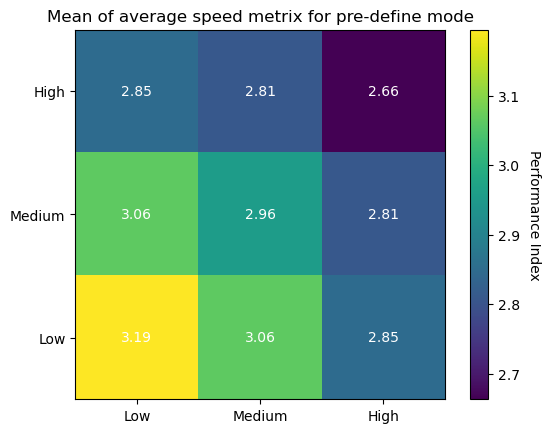

In [78]:
variables = ['Low', 'Medium', 'High']
values = [
    [mean_speed_normal_HL, mean_speed_normal_HM, mean_speed_normal_HH],
    [mean_speed_normal_ML, mean_speed_normal_MM, mean_speed_normal_HM],
    [mean_speed_normal_LL, mean_speed_normal_ML, mean_speed_normal_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Mean of average speed metrix for pre-define mode")
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Performance Index', rotation=270, labelpad=15)  # 在色带旁边添加文本说明

# 显示热图
plt.show()

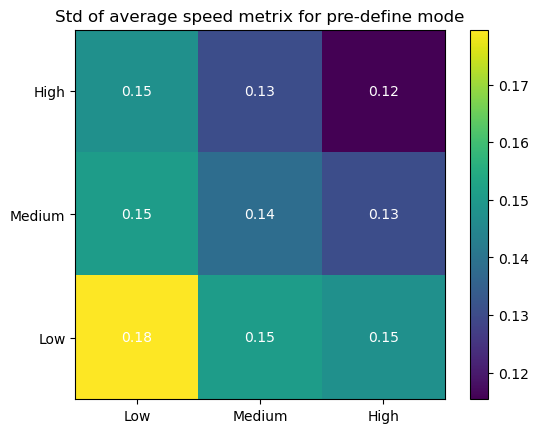

In [57]:
variables = ['Low', 'Medium', 'High']
values = [
    [std_speed_normal_HL, std_speed_normal_HM, std_speed_normal_HH],
    [std_speed_normal_ML, std_speed_normal_MM, std_speed_normal_HM],
    [std_speed_normal_LL, std_speed_normal_ML, std_speed_normal_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Std of average speed metrix for pre-define mode")
plt.colorbar(im)

# 显示热图
plt.show()

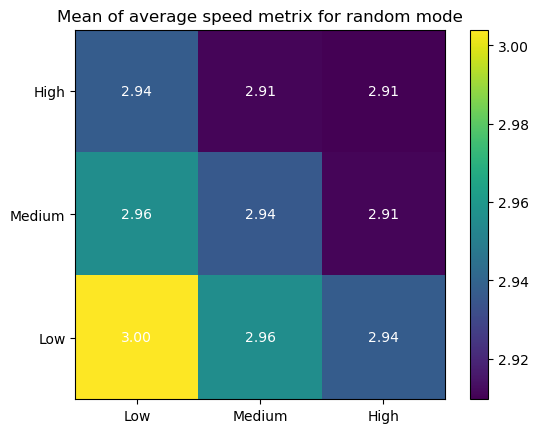

In [58]:
variables = ['Low', 'Medium', 'High']
values = [
    [mean_speed_random_HL, mean_speed_random_HM, mean_speed_random_HH],
    [mean_speed_random_ML, mean_speed_random_MM, mean_speed_random_HM],
    [mean_speed_random_LL, mean_speed_random_ML, mean_speed_random_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Mean of average speed metrix for random mode")
plt.colorbar(im)

# 显示热图
plt.show()

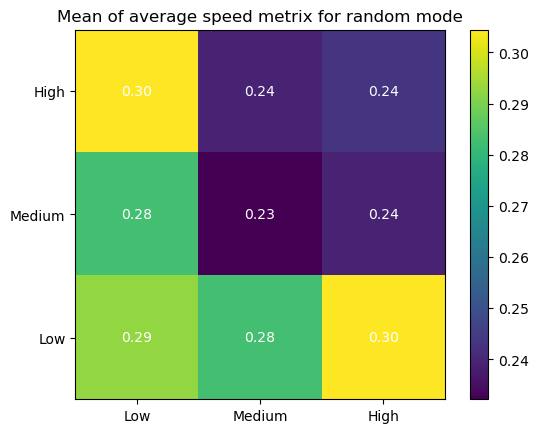

In [59]:
variables = ['Low', 'Medium', 'High']
values = [
    [std_speed_random_HL, std_speed_random_HM, std_speed_random_HH],
    [std_speed_random_ML, std_speed_random_MM, std_speed_random_HM],
    [std_speed_random_LL, std_speed_random_ML, std_speed_random_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Mean of average speed metrix for random mode")
plt.colorbar(im)

# 显示热图
plt.show()

In [60]:
pre_mode_value_HH = getValue(normal_HH.describe().loc['mean'] - random_HH.describe().loc['mean'])
pre_mode_value_HM = getValue(normal_HM.describe().loc['mean'] - random_HM.describe().loc['mean'])
pre_mode_value_HL = getValue(normal_HL.describe().loc['mean'] - random_HL.describe().loc['mean'])
pre_mode_value_MM = getValue(normal_MM.describe().loc['mean'] - random_MM.describe().loc['mean'])
pre_mode_value_ML = getValue(normal_ML.describe().loc['mean'] - random_ML.describe().loc['mean'])
pre_mode_value_LL = getValue(normal_LL.describe().loc['mean'] - random_LL.describe().loc['mean'])

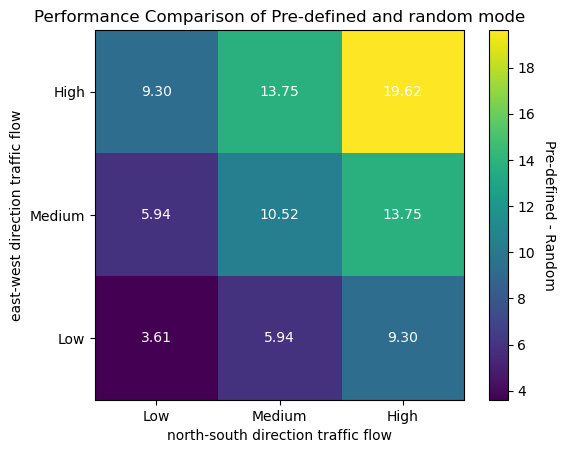

In [88]:
variables = ['Low', 'Medium', 'High']
values = [
    [pre_mode_value_HL, pre_mode_value_HM, pre_mode_value_HH],
    [pre_mode_value_ML, pre_mode_value_MM, pre_mode_value_HM],
    [pre_mode_value_LL, pre_mode_value_ML, pre_mode_value_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Performance Comparison of Pre-defined and random mode")
ax.set_xlabel('north-south direction traffic flow')
ax.set_ylabel('east-west direction traffic flow')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Pre-defined - Random', rotation=270, labelpad=15)  # 在色带旁边添加文本说明


# 显示热图
plt.show()

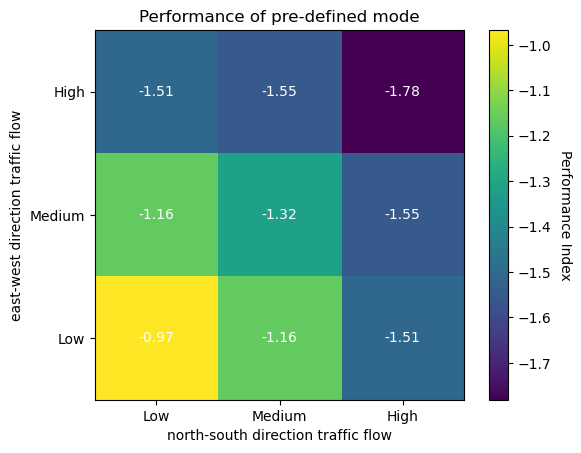

In [82]:
# performance of pre-define
pre_value_HH = getValue_single(normal_HH.describe().loc['mean'])
pre_value_HM = getValue_single(normal_HM.describe().loc['mean'])
pre_value_HL = getValue_single(normal_HL.describe().loc['mean'])
pre_value_MM = getValue_single(normal_MM.describe().loc['mean'])
pre_value_ML = getValue_single(normal_ML.describe().loc['mean'])
pre_value_LL = getValue_single(normal_LL.describe().loc['mean'])

plot_name = 'Performance of pre-defined mode'

metrix = [
    [pre_value_HL, pre_value_HM, pre_value_HH],
    [pre_value_ML, pre_value_MM, pre_value_HM],
    [pre_value_LL, pre_value_ML, pre_value_HL]
]

getMetrixPlot(metrix, plot_name, 'Performance Index')

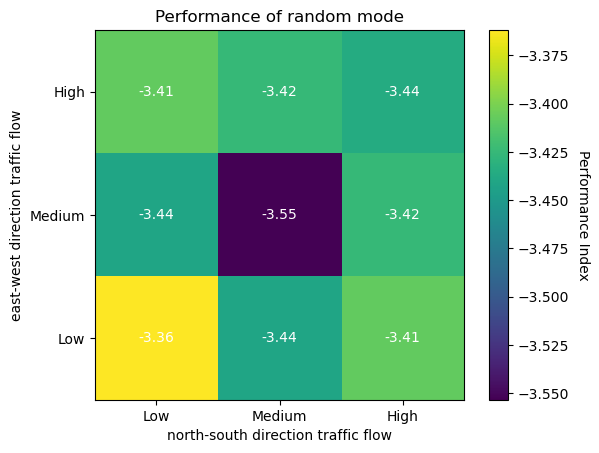

In [83]:
# performance of random
random_value_HH = getValue_single(random_HH.describe().loc['mean'])
random_value_HM = getValue_single(random_HM.describe().loc['mean'])
random_value_HL = getValue_single(random_HL.describe().loc['mean'])
random_value_MM = getValue_single(random_MM.describe().loc['mean'])
random_value_ML = getValue_single(random_ML.describe().loc['mean'])
random_value_LL = getValue_single(random_LL.describe().loc['mean'])

plot_name = 'Performance of random mode'

metrix = [
    [random_value_HL, random_value_HM, random_value_HH],
    [random_value_ML, random_value_MM, random_value_HM],
    [random_value_LL, random_value_ML, random_value_HL]
]

getMetrixPlot(metrix, plot_name, 'Performance Index')

## Q-Learning mode

In [64]:
csv_rl_HH = pd.read_csv('./model/final/0_singel_junction_model_RL RL_HH-table.csv')
csv_rl_HM = pd.read_csv('./model/final/0_singel_junction_model_RL RL_HM-table.csv')
csv_rl_HL = pd.read_csv('./model/final/0_singel_junction_model_RL RL_HL-table.csv')
csv_rl_MM = pd.read_csv('./model/final/0_singel_junction_model_RL RL_MM-table.csv')
csv_rl_ML = pd.read_csv('./model/final/0_singel_junction_model_RL RL_ML-table.csv')
csv_rl_LL = pd.read_csv('./model/final/0_singel_junction_model_RL RL_LL-table.csv')

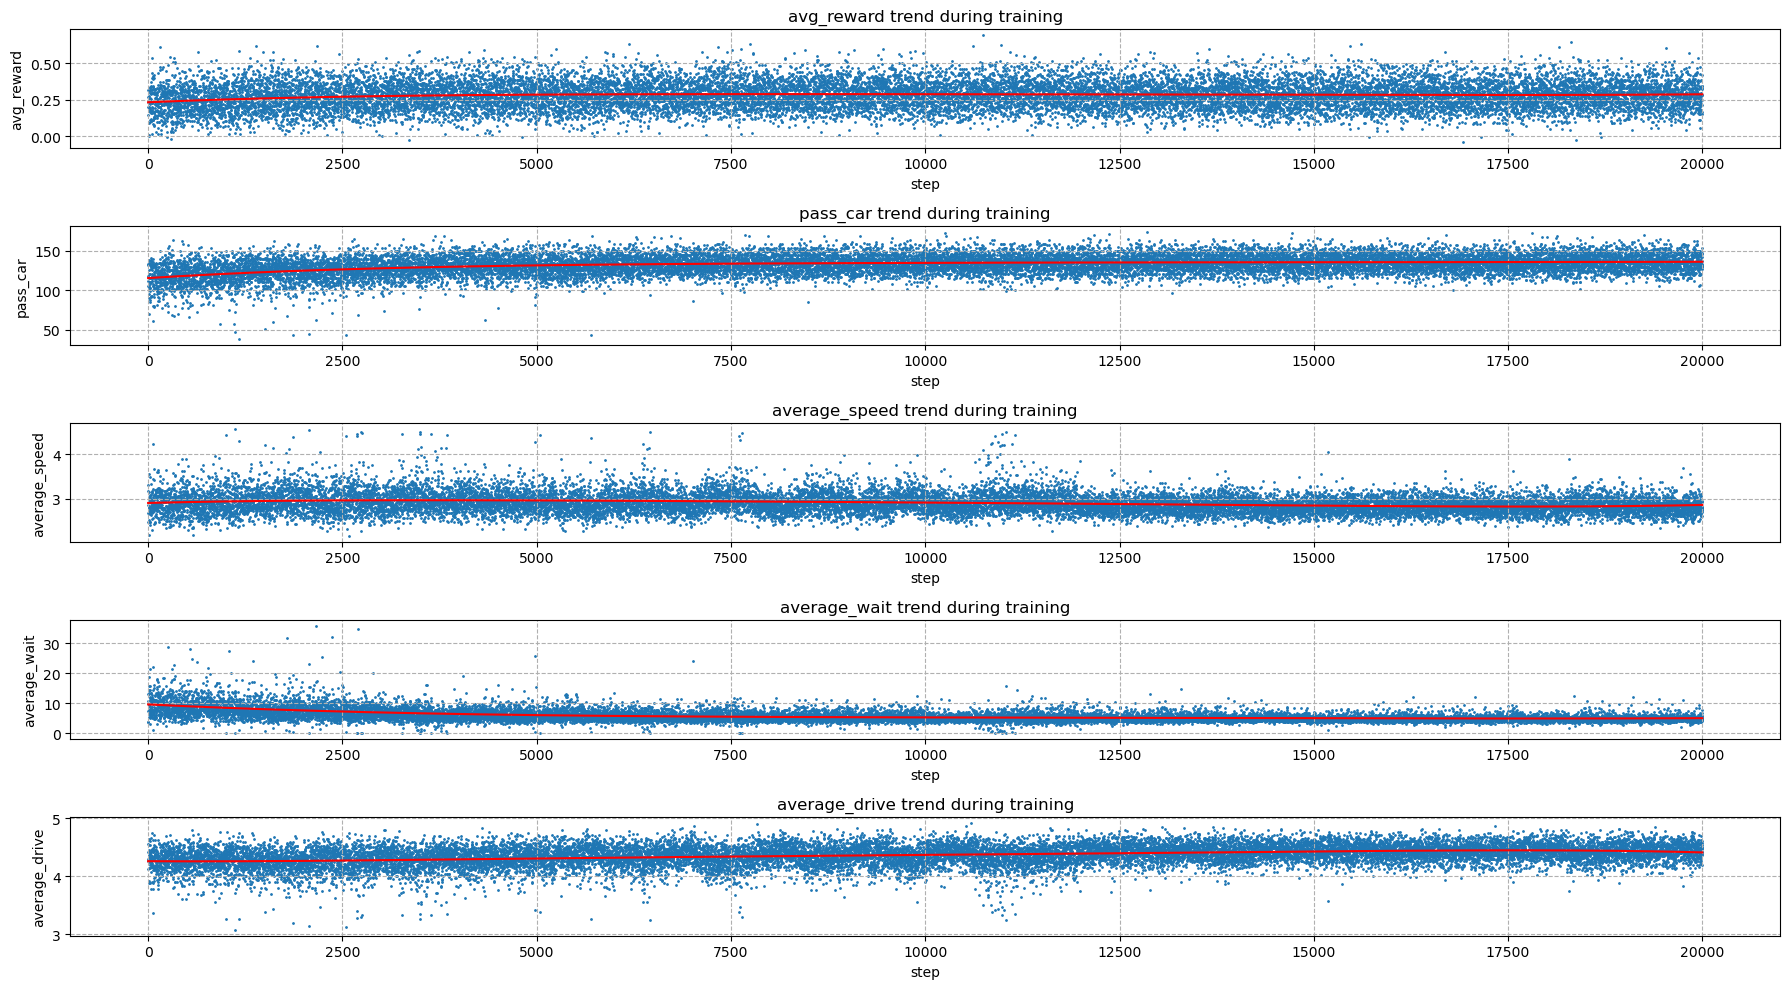

In [65]:
# Demonstration of trends during model training
getTrend(getRLData(csv_rl_HL))

In [66]:
data_QL_HH = getRLData(csv_rl_HH)[-100:]
data_QL_HM = getRLData(csv_rl_HM)[-100:]
data_QL_HL = getRLData(csv_rl_HL)[-100:]
data_QL_MM = getRLData(csv_rl_MM)[-100:]
data_QL_ML = getRLData(csv_rl_ML)[-100:]
data_QL_LL = getRLData(csv_rl_LL)[-100:]

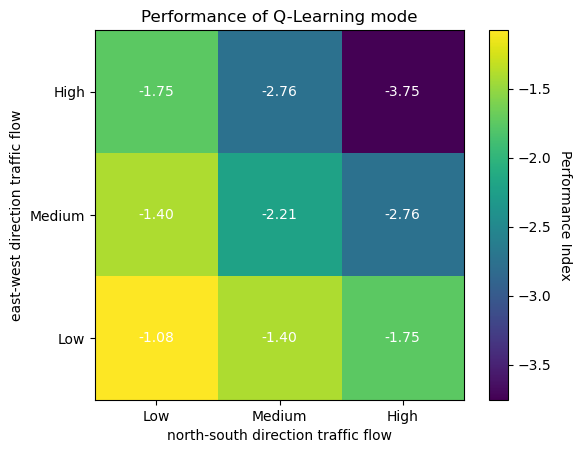

In [84]:
# performance of QL
rl_value_HH = getValue_single(data_QL_HH.describe().loc['mean'])
rl_value_HM = getValue_single(data_QL_HM.describe().loc['mean'])
rl_value_HL = getValue_single(data_QL_HL.describe().loc['mean'])
rl_value_MM = getValue_single(data_QL_MM.describe().loc['mean'])
rl_value_ML = getValue_single(data_QL_ML.describe().loc['mean'])
rl_value_LL = getValue_single(data_QL_LL.describe().loc['mean'])

plot_name = 'Performance of Q-Learning mode'

metrix = [
    [rl_value_HL, rl_value_HM, rl_value_HH],
    [rl_value_ML, rl_value_MM, rl_value_HM],
    [rl_value_LL, rl_value_ML, rl_value_HL]
]

getMetrixPlot(metrix, plot_name, 'Performance Index')

In [68]:
pre_rl_value_HH = getValue(data_QL_HH.describe().loc['mean'] - normal_HH.describe().loc['mean'])
pre_rl_value_HM = getValue(data_QL_HM.describe().loc['mean'] - normal_HM.describe().loc['mean'])
pre_rl_value_HL = getValue(data_QL_HL.describe().loc['mean'] - normal_HL.describe().loc['mean'])
pre_rl_value_MM = getValue(data_QL_MM.describe().loc['mean'] - normal_MM.describe().loc['mean'])
pre_rl_value_ML = getValue(data_QL_ML.describe().loc['mean'] - normal_ML.describe().loc['mean'])
pre_rl_value_LL = getValue(data_QL_LL.describe().loc['mean'] - normal_LL.describe().loc['mean'])

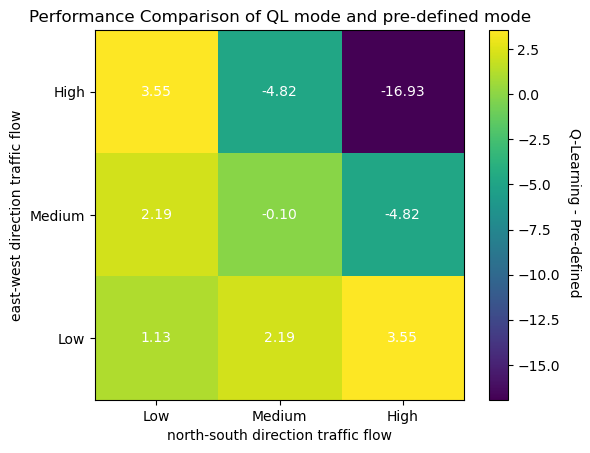

In [89]:
variables = ['Low', 'Medium', 'High']
values = [
    [pre_rl_value_HL, pre_rl_value_HM, pre_rl_value_HH],
    [pre_rl_value_ML, pre_rl_value_MM, pre_rl_value_HM],
    [pre_rl_value_LL, pre_rl_value_ML, pre_rl_value_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Performance Comparison of QL mode and pre-defined mode")
ax.set_xlabel('north-south direction traffic flow')
ax.set_ylabel('east-west direction traffic flow')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Q-Learning - Pre-defined ', rotation=270, labelpad=15)  # 在色带旁边添加文本说明

# 显示热图
plt.show()

In [70]:
ran_rl_value_HH = getValue(data_QL_HH.describe().loc['mean'] - random_HH.describe().loc['mean'])
ran_rl_value_HM = getValue(data_QL_HM.describe().loc['mean'] - random_HM.describe().loc['mean'])
ran_rl_value_HL = getValue(data_QL_HL.describe().loc['mean'] - random_HL.describe().loc['mean'])
ran_rl_value_MM = getValue(data_QL_MM.describe().loc['mean'] - random_MM.describe().loc['mean'])
ran_rl_value_ML = getValue(data_QL_ML.describe().loc['mean'] - random_ML.describe().loc['mean'])
ran_rl_value_LL = getValue(data_QL_LL.describe().loc['mean'] - random_LL.describe().loc['mean'])

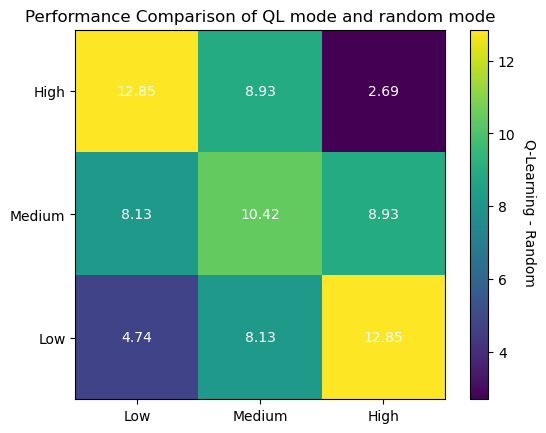

In [87]:
variables = ['Low', 'Medium', 'High']
values = [
    [ran_rl_value_HL, ran_rl_value_HM, ran_rl_value_HH],
    [ran_rl_value_ML, ran_rl_value_MM, ran_rl_value_HM],
    [ran_rl_value_LL, ran_rl_value_ML, ran_rl_value_HL]
]

# 创建热图
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='viridis')

# 添加标签
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

# 设置坐标轴
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables)
ax.set_yticklabels(['High', 'Medium', 'Low'])
ax.set_title("Performance Comparison of QL mode and random mode")
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Q-Learning - Random ', rotation=270, labelpad=15)  # 在色带旁边添加文本说明


# 显示热图
plt.show()

In [72]:
data_normal = normal_HL.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]
data_random = random_HL.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]
data_rl = data_QL_HL.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]

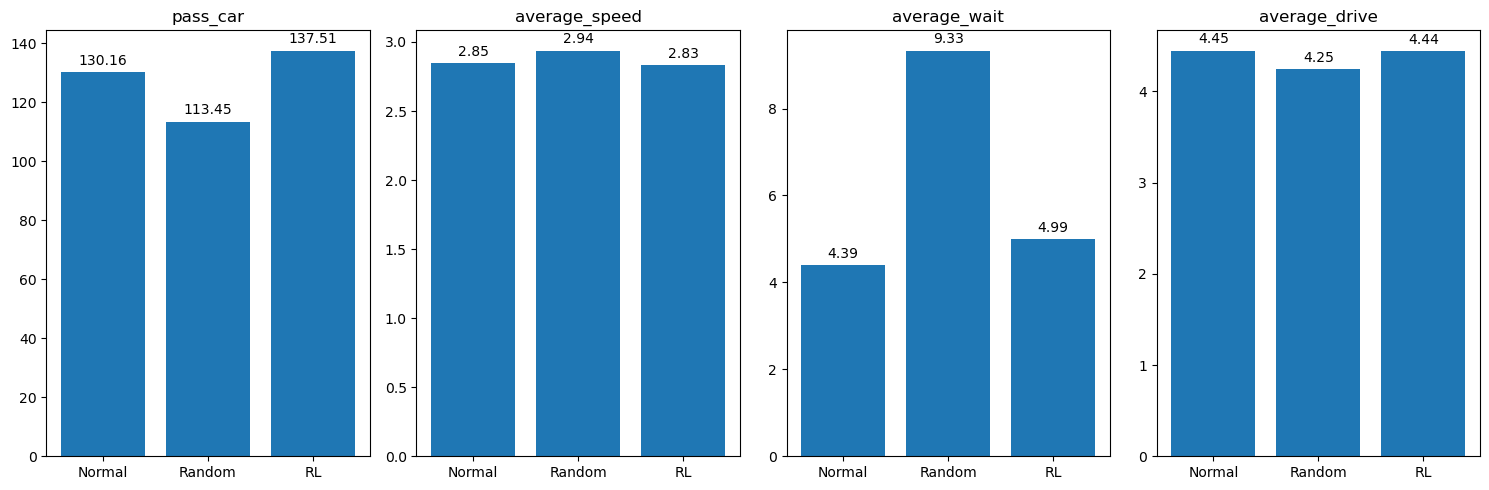

In [73]:
indicators = ['pass_car', 'average_speed', 'average_wait', 'average_drive']

fig, axes = plt.subplots(1, len(indicators), figsize=(15, 5))

# 循环绘制每个柱状图
for i, indicator in enumerate(indicators):
    ax = axes[i]
    data_values = [data_normal[indicator], data_random[indicator], data_rl[indicator]]
    x = np.arange(len(data_values))
    bars = ax.bar(x, data_values)
    ax.set_xticks(x)
    ax.set_xticklabels(['Normal', 'Random', 'RL'])
    ax.set_title(indicator)
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()


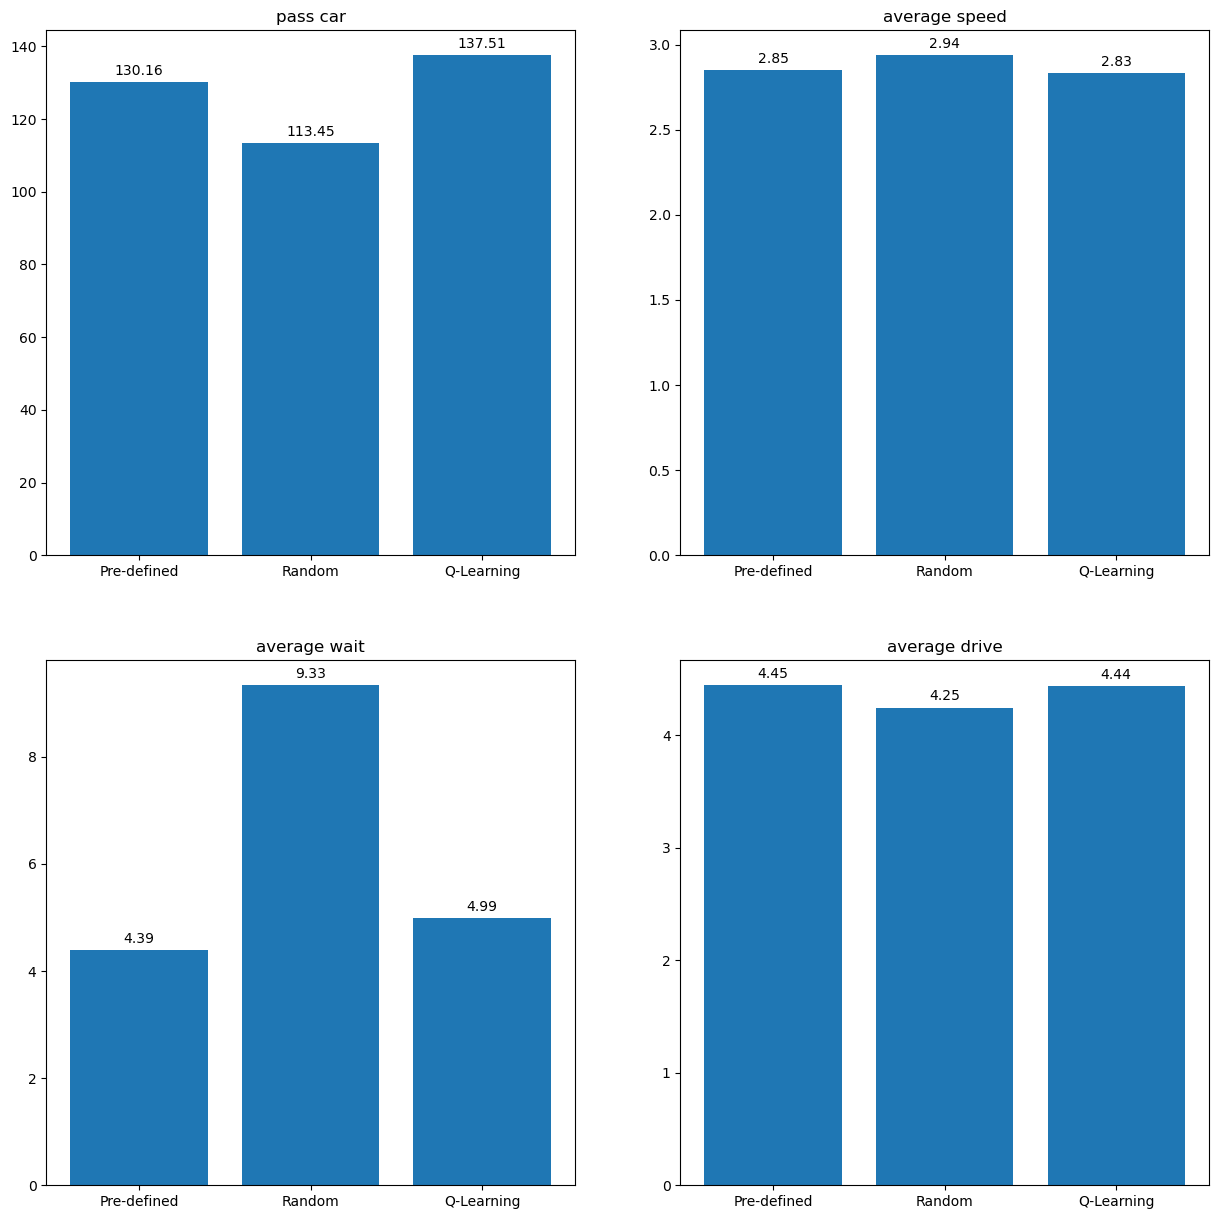

In [74]:
indicators = ['pass_car', 'average_speed', 'average_wait', 'average_drive']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns

# 循环绘制每个柱状图
for i, indicator in enumerate(indicators):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    
    ax = axes[row, col]
    data_values = [data_normal[indicator], data_random[indicator], data_rl[indicator]]
    x = np.arange(len(data_values))
    bars = ax.bar(x, data_values)
    ax.set_xticks(x)
    ax.set_xticklabels(['Pre-defined', 'Random', 'Q-Learning'])
    ax.set_title(indicator.replace('_', ' '))
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 调整子图之间的间距
# plt.tight_layout()

# 显示图表
plt.show()